In [353]:
pip install -U seaborn

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [354]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [355]:
df = pd.read_csv('cardio.csv', 
                 sep=';',
                index_col='id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Exploratory Data Analysis

In [356]:
# check null values
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [357]:
# check data types
df.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [358]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [359]:
# lets adapt age in days to age in years
df.age = (df.age.values / 365).astype('int')

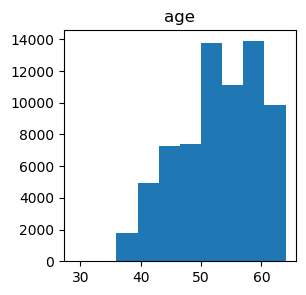

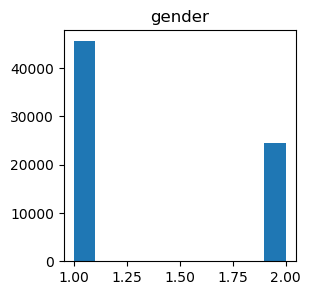

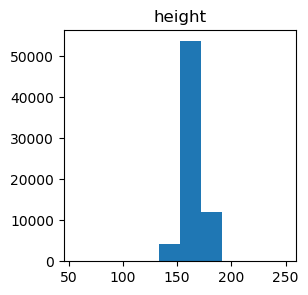

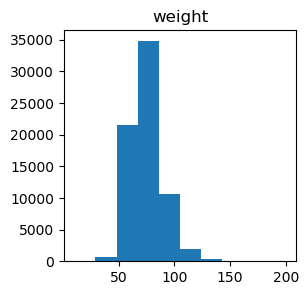

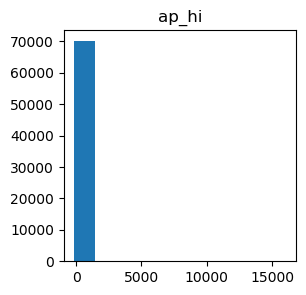

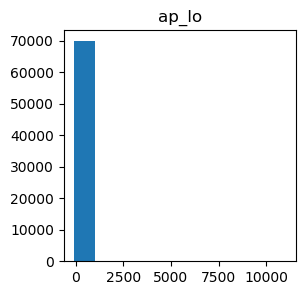

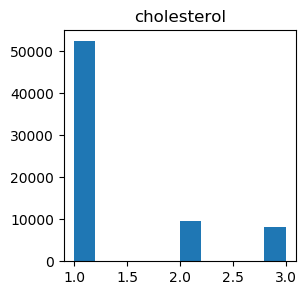

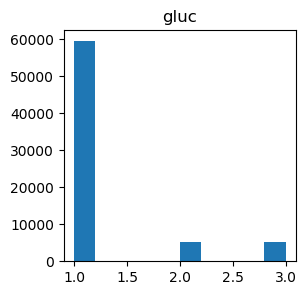

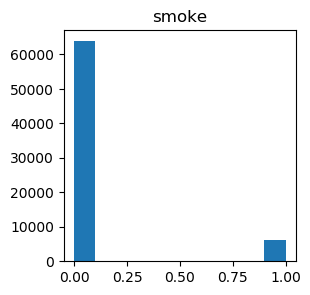

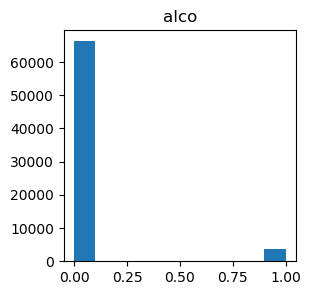

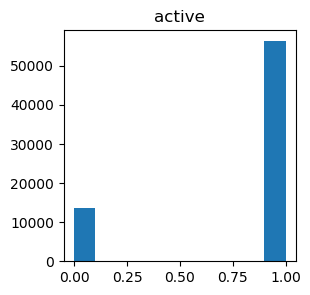

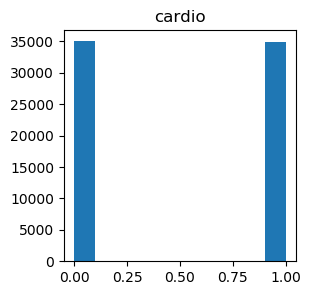

In [360]:
# show histograms 
for col in df.columns:
    plt.figure(figsize=(3,3))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

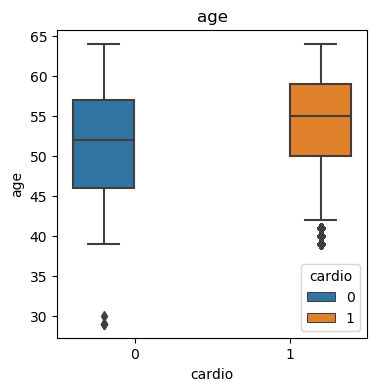

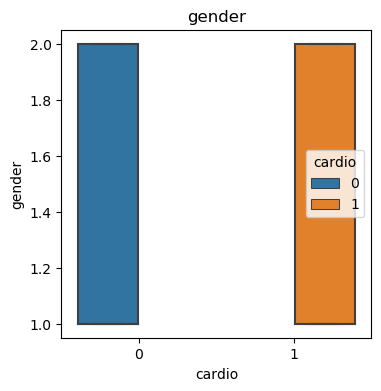

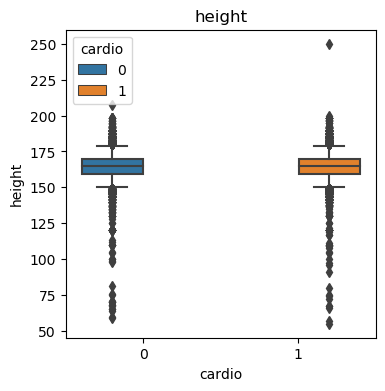

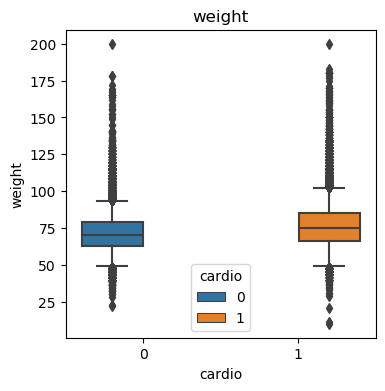

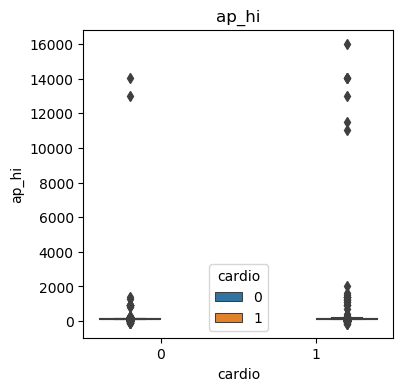

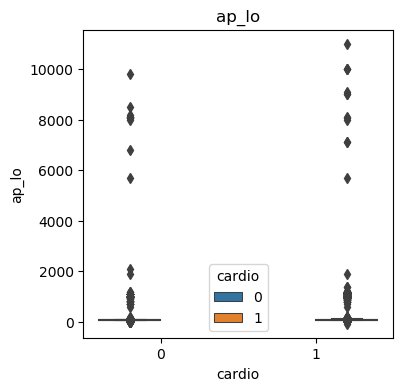

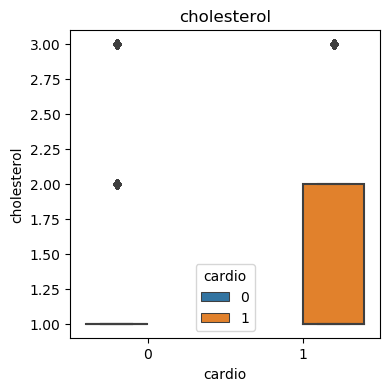

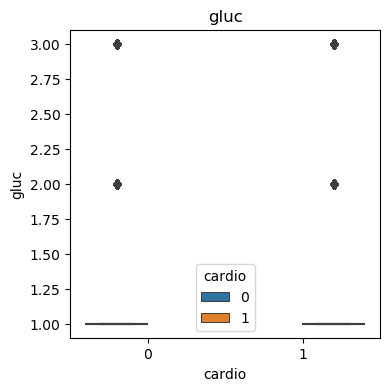

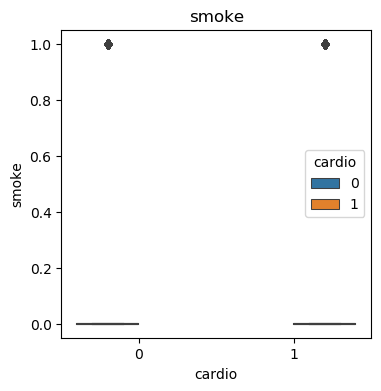

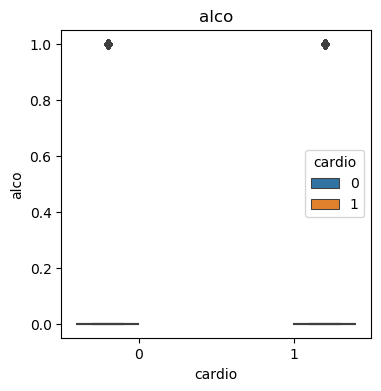

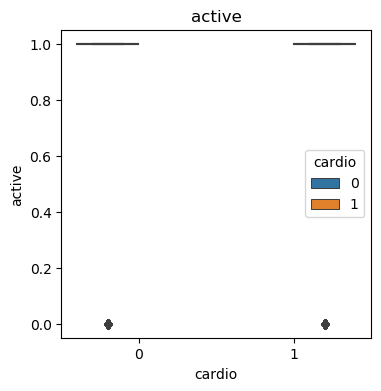

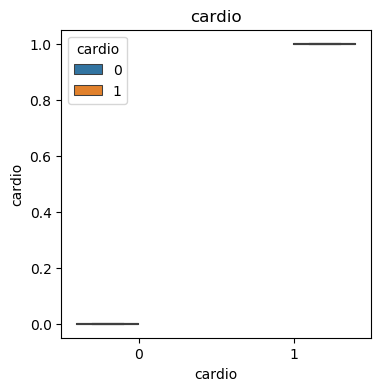

In [361]:
# show boxplots stratified by target variable
for feat in df.columns:
    fig, axs = plt.subplots(1,1,figsize=(4,4))
    sns.boxplot(y=feat, x='cardio' , data=df, hue="cardio", orient='v', whis=0.9,  ax=axs)
    axs.set_title(feat)
    plt.show()

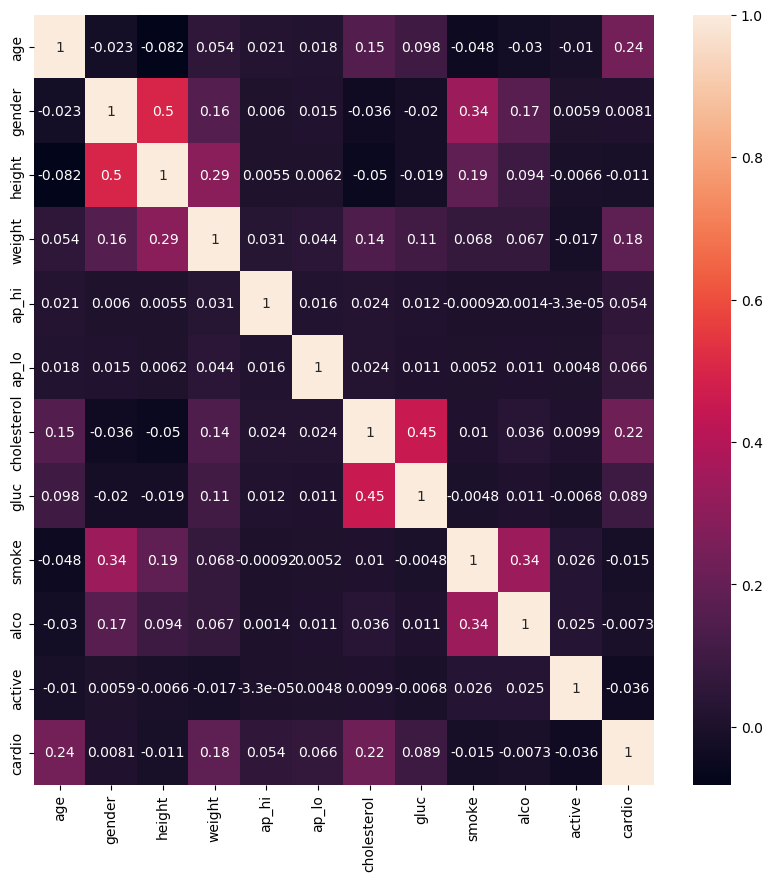

In [362]:
# show correlations
fig, axs = plt.subplots(1,1,figsize=(10,10))
corr_mat = df.corr()
sns.heatmap(corr_mat, annot=True, ax=axs)
plt.show()

# Modeling using Sklearn

In [363]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [364]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [365]:
# seperate features and target
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [366]:
X.shape, y.shape

((70000, 11), (70000,))

In [367]:
# train-test split
from sklearn.model_selection import train_test_split

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [369]:
# min-max scale data for faster and more robust fitting
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [370]:
# first use sklearn models to later on benchmark aws models against
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score, f1_score

In [371]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [372]:
# validate model´s performance

# train data
print('accuracy score on train data: {:.2f}'.format(accuracy_score(y_train, model.predict(X_train_scaled))))
print('rocauc score on train data: {:.2f}'.format(roc_auc_score(y_train, model.predict(X_train_scaled))))
print('recall score on train data: {:.2f}'.format(recall_score(y_train, model.predict(X_train_scaled))))
print('precision score on train data: {:.2f}'.format(precision_score(y_train, model.predict(X_train_scaled))))
print('f1 score on train data: {:.2f}'.format(f1_score(y_train, model.predict(X_train_scaled))))
print('-----------------\n')
# test data
print('accuracy score on test data: {:.2f}'.format(accuracy_score(y_test, model.predict(X_test_scaled))))
print('rocauc score on test data: {:.2f}'.format(roc_auc_score(y_test, model.predict(X_test_scaled))))
print('recall score on test data: {:.2f}'.format(recall_score(y_test, model.predict(X_test_scaled))))
print('precision score on test data: {:.2f}'.format(precision_score(y_test, model.predict(X_test_scaled))))
print('f1 score on test data: {:.2f}'.format(f1_score(y_test, model.predict(X_test_scaled))))

accuracy score on train data: 0.65
rocauc score on train data: 0.65
recall score on train data: 0.61
precision score on train data: 0.65
f1 score on train data: 0.63
-----------------

accuracy score on test data: 0.65
rocauc score on test data: 0.65
recall score on test data: 0.62
precision score on test data: 0.67
f1 score on test data: 0.64


# Modeling using Sagemaker

In [373]:
import sagemaker
import boto3

# let´s create a sagemaker session
sagemaker_session = sagemaker.Session()

# create bucket if not exists
#s3 = boto3.resource('s3')
s3 = boto3.client('s3')
bucket = 'sagemaker-studio-1037218'
s3.create_bucket(Bucket=bucket)

# get execution role
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::103721820087:role/service-role/AmazonSageMaker-ExecutionRole-20190909T202771


In [374]:
import io
import sagemaker.amazon.common as smac

In [375]:
# create in-memory byte array
buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, X_train_scaled, y_train)
buf.seek(0) # reset the buffer

0

In [376]:
# upload data to s3
prefix = 'linear_learner'
key = 'linear-train-data'
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# let´s print the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data to location: {}'.format(s3_train_data))

# let´s create an output placeholder in s3 to store the trained mode artifact
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Trained model artifact will be uploaded to: {}'.format(output_location))

uploaded training data to location: s3://sagemaker-studio-1037218/linear_learner/train/linear-train-data
Trained model artifact will be uploaded to: s3://sagemaker-studio-1037218/linear_learner/output


In [377]:
# get reference to the linear learner container image
from sagemaker import image_uris
container = sagemaker.image_uris.retrieve(framework="linear-learner", 
                                          region=boto3.Session().region_name)

In [378]:
# instantiate the model
linear = sagemaker.estimator.Estimator(container,
                                      role, 
                                      instance_count=1,
                                      instance_type='ml.c4.xlarge',
                                      output_path=output_location,
                                      sagemaker_session=sagemaker_session,
                                      use_spot_instances=True,
                                      max_run=300,
                                      max_wait=600)

In [379]:
# set hyperparameter
linear.set_hyperparameters(feature_dim=X_train_scaled.shape[1], 
                           predictor_type='binary_classifier',
                           mini_batch_size=100,
                           epochs=5,
                           num_models=16,
                           loss='logistic')

In [380]:
# fit the model
linear.fit({'train': s3_train_data})

2022-06-16 08:00:50 Starting - Starting the training job...
2022-06-16 08:00:52 Starting - Launching requested ML instancesProfilerReport-1655366450: InProgress
.........
2022-06-16 08:02:44 Starting - Preparing the instances for training............
2022-06-16 08:04:40 Downloading - Downloading input data
2022-06-16 08:04:40 Training - Downloading the training image.....Docker entrypoint called with argument(s): train
Running default environment configuration script
[06/16/2022 08:05:32 INFO 140284915681088] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optim

# Deploy Model

In [381]:
# deploy model to perform inference
linear_classifier = linear.deploy(initial_instance_count=1,
                                  instance_type='ml.c4.xlarge')

--------!

In [ ]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

linear_classifier.serializer = CSVSerializer()
linear_classifier.deserializer = JSONDeserializer()

# Model Evaluation

In [387]:
# predict on test data
predictions = linear_classifier.predict(X_test_scaled, initial_args={"ContentType": "text/csv"})
predictions['predictions'][:3]

[{'score': 0.15379288792610168, 'predicted_label': 0},
 {'score': 0.2733301520347595, 'predicted_label': 0},
 {'score': 0.39200150966644287, 'predicted_label': 0}]

In [388]:
# transform predictions
preds_score = np.array([pred['score'] for pred in predictions['predictions']])
preds_label = np.array([pred['predicted_label'] for pred in predictions['predictions']])

In [389]:
# validate model´s performance on test data
print('accuracy score on test data: {:.2f}'.format(accuracy_score(y_test, preds_label)))
print('rocauc score on test data: {:.2f}'.format(roc_auc_score(y_test, preds_score)))
print('recall score on test data: {:.2f}'.format(recall_score(y_test, preds_label)))
print('precision score on test data: {:.2f}'.format(precision_score(y_test, preds_label)))
print('f1 score on test data: {:.2f}'.format(f1_score(y_test, preds_label)))

accuracy score on test data: 0.72
rocauc score on test data: 0.78
recall score on test data: 0.69
precision score on test data: 0.73
f1 score on test data: 0.71


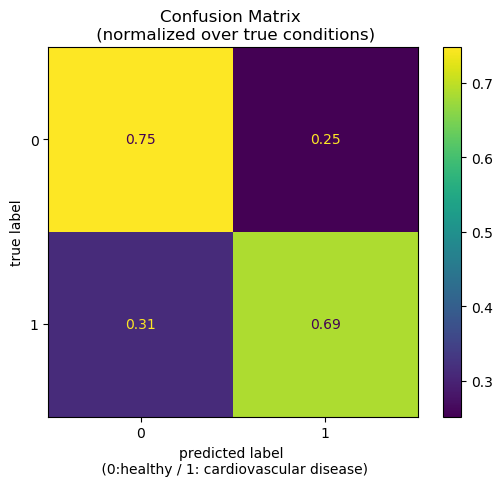

In [423]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, preds_label, normalize='true', labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.title('Confusion Matrix \n (normalized over true conditions)')
plt.xlabel('predicted label \n (0:healthy / 1: cardiovascular disease)')
plt.ylabel('true label')
plt.show()

In [464]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, _ = precision_recall_curve(y_test, preds_score)

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Recall-Precision Curve')
plt.grid('on')

plt.savefig('figures/precision_recall.png', format='png')

<Figure size 640x480 with 0 Axes>

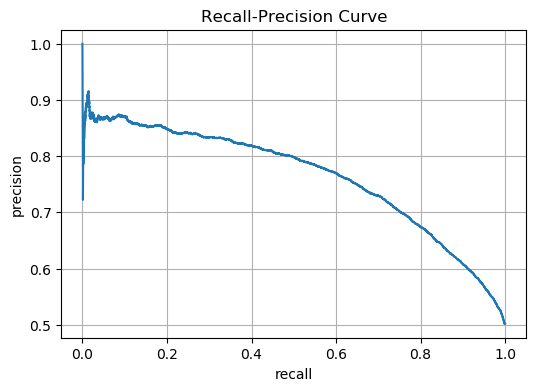

In [465]:
plt.show()

# Improve the Model Using XGBoost

In [327]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [328]:
# put the target column first
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]
df.head()

,cardio,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,,
0,0,50,2,168,62.0,110,80,1,1,0,0,1
1,1,55,1,156,85.0,140,90,3,1,0,0,1
2,1,51,1,165,64.0,130,70,3,1,0,0,0
3,1,48,2,169,82.0,150,100,1,1,0,0,1
4,0,47,1,156,56.0,100,60,1,1,0,0,0


In [329]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [330]:
# save to local
df_train.to_csv('train.csv', header=False, index=False)
df_test.to_csv('test.csv', header=False, index=False)

In [331]:
from sagemaker.xgboost.estimator import XGBoost

In [332]:
# upload data to s3
prefix = 'xgboost_learner'

# let´s print the training data location in s3
key = 'xgboost-train-data'
with open('train.csv', 'rb') as f:
    boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data to location: {}'.format(s3_train_data))

# let´s print the training data location in s3
key = 'xgboost-test-data'
with open('test.csv', 'rb') as f:
    boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(f)
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
print('uploaded test data to location: {}'.format(s3_test_data))

# let´s create an output placeholder in s3 to store the trained mode artifact
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Trained model artifact will be uploaded to: {}'.format(output_location))

uploaded training data to location: s3://sagemaker-studio-1037218/xgboost_learner/train/xgboost-train-data
uploaded test data to location: s3://sagemaker-studio-1037218/xgboost_learner/test/xgboost-test-data
Trained model artifact will be uploaded to: s3://sagemaker-studio-1037218/xgboost_learner/output


In [333]:
container = sagemaker.image_uris.retrieve(framework="xgboost",
                                          version='0.90-2', 
                                          region=boto3.Session().region_name)

In [334]:
# instantiate the model
xgboost = sagemaker.estimator.Estimator(container,
                                          role, 
                                          instance_count=1,
                                          instance_type='ml.c4.xlarge',
                                          output_path=output_location,
                                          sagemaker_session=sagemaker_session,
                                          use_spot_instances=True,
                                          max_run=300,
                                          max_wait=600)

In [335]:
# set hyperparameters
xgboost.set_hyperparameters(max_depth=3,
                            objective='multi:softmax',
                            num_class=2,
                            eta=0.5,
                            num_round=100)

In [336]:
from sagemaker.inputs import TrainingInput
train_input = TrainingInput(s3_data=s3_train_data, content_type='csv', s3_data_type='S3Prefix')
valid_input = TrainingInput(s3_data=s3_test_data, content_type='csv', s3_data_type='S3Prefix')

In [337]:
#train_input = sagemaker.session.s3_input(s3_data=s3_train_data, content_type='csv', s3_data_type='S3Prefix')
#valid_input = sagemaker.session.s3_input(s3_data=s3_test_data, content_type='csv', s3_data_type='S3Prefix')

In [338]:
data_channels = {'train': train_input,
                 'validation': valid_input}

In [339]:
xgboost.fit(data_channels)

2022-06-15 18:24:39 Starting - Starting the training job...
2022-06-15 18:24:41 Starting - Launching requested ML instancesProfilerReport-1655317478: InProgress
.........
2022-06-15 18:26:32 Starting - Preparing the instances for training......
2022-06-15 18:27:33 Downloading - Downloading input data...
2022-06-15 18:27:59 Training - Downloading the training image...
2022-06-15 18:28:38 Uploading - Uploading generated training model
2022-06-15 18:28:38 Completed - Training job completed
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value multi:softmax to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV inpu

# Deploy XGBOOST

In [340]:
# deploy model to perform inference
xgboost_classifier = xgboost.deploy(initial_instance_count=1,
                                      instance_type='ml.c4.xlarge')

--------!

In [349]:
#xgboost_classifier.content_type = 'text/csv'
xgboost_classifier.serializer = CSVSerializer
xgboost_classifier.deserializer = None

In [343]:
df_test.drop('cardio', axis=1)[0:1].values[0]

array([ 43.,   1., 160., 135., 120.,  80.,   2.,   1.,   0.,   0.,   1.])

In [350]:
# predict on test data
#xgboost_classifier.predict(df_test.drop('cardio', axis=1)[0:1].values[0])

# Delete Model Endpoint

In [351]:
linear_classifier.delete_endpoint()
xgboost_classifier.delete_endpoint()